In [1]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2022-11-04 01:21:15--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.165.192
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.165.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  --.-KB/s    in 0.1s    

2022-11-04 01:21:15 (94.7 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [2]:
# 기온예측문제
import pandas as pd
df = pd.read_csv('/content/jena_climate_2009_2016.csv')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [3]:
import os
fname = os.path.join('/content/jena_climate_2009_2016.csv')
with open(fname) as f:
  data = f.read()

lines = data.split('\n')

In [4]:
header = lines[0].split(',')
lines = lines[1:]

In [5]:
type(header), type(df.columns.tolist())

(list, list)

In [6]:
lines, type(lines)

(['01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30',
  '01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10',
  '01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60',
  '01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00',
  '01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30',
  '01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70',
  '01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.50',
  '01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.40,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.60',
  '01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.80,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.50',
  '01.01.2009 01:40:00,996.53,-8.43,2

In [7]:
# 데이터 파싱
import numpy as np
temperature = np.zeros((len(lines)))
raw_data = np.zeros((len(lines), len(header)-1))

In [8]:
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(',')[1:]]
  temperature[i] = values[1]
  raw_data[i,:] = values[:]

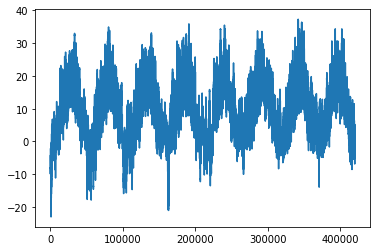

In [9]:
# 전체 기온을 그래프로 그리기
import matplotlib.pyplot as plt
plt.plot(range(len(temperature)), temperature)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

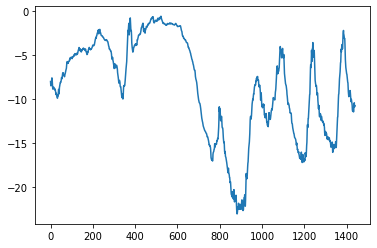

In [10]:
plt.plot(range(1440),temperature[:1440])
plt.show

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
split1 = int(len(raw_data)*0.5)
split2 = int(len(raw_data)*0.25)
train_samples = raw_data[:split1]
val_samples = raw_data[split1:split1+split2]
test_samples = raw_data[split1+split2:]

In [13]:
len(raw_data)

420451

In [14]:
len(train_samples) , len(val_samples), len(test_samples)

(210225, 105112, 105114)

In [15]:
# 데이터 정규화 train data
from copy import deepcopy

raw_data2 = deepcopy(raw_data)
mean = train_samples.mean()
raw_data2 -= mean
std = train_samples.std()
raw_data2 /= std

In [16]:
from tensorflow import keras

In [17]:
int_sequence = np.arange(10)
int_sequence

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data = int_sequence[:-3],
    targets = int_sequence[3:],
    sequence_length = 3,
    batch_size = 2
)

In [19]:
int_sequence[:-3], int_sequence[3:]

(array([0, 1, 2, 3, 4, 5, 6]), array([3, 4, 5, 6, 7, 8, 9]))

In [20]:
for inputs, targets in dummy_dataset:
    print(inputs, targets)

tf.Tensor(
[[0 1 2]
 [1 2 3]], shape=(2, 3), dtype=int64) tf.Tensor([3 4], shape=(2,), dtype=int64)
tf.Tensor(
[[2 3 4]
 [3 4 5]], shape=(2, 3), dtype=int64) tf.Tensor([5 6], shape=(2,), dtype=int64)
tf.Tensor([[4 5 6]], shape=(1, 3), dtype=int64) tf.Tensor([7], shape=(1,), dtype=int64)


In [21]:
# 훈련,검증,테스트 데이터셋 만들기
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length+24-1)
batch_size = 256
train_dataset = keras.utils.timeseries_dataset_from_array(
    data  = raw_data2[:-delay],
    targets = temperature[delay:],
    sampling_rate = sampling_rate,
    sequence_length = 120,
    shuffle = True,
    batch_size = batch_size,
    start_index = 0,
    end_index = split1
)

val_dataset = keras.utils.timeseries_dataset_from_array(
    data  = raw_data2[:-delay],
    targets = temperature[delay:],
    sampling_rate = sampling_rate,
    sequence_length = 120,
    shuffle = True,
    batch_size = batch_size,
    start_index = split1,
    end_index = split1+split2
)

test_dataset = keras.utils.timeseries_dataset_from_array(
    data  = raw_data2[:-delay],
    targets = temperature[delay:],
    sampling_rate = sampling_rate,
    sequence_length = 120,
    shuffle = True,
    batch_size = batch_size,
    start_index = split1+split2,
)

In [22]:
for samples, targets in train_dataset:
  print(samples.shape, targets.shape)
  break


(256, 120, 14) (256,)


In [23]:
# 기준 모델의 MAE 계산하기
def evaluate_native_method(dataset):
  total_abs_err = 0.
  samples_seen = 0.
  for samples, targets in dataset:
    preds = samples[:,-1,1]*std  + mean
    total_abs_err += np.sum(np.abs(preds - targets))
    samples_seen += samples.shape[0]
  return total_abs_err / samples_seen

In [24]:
print(f'검증 MAE :{evaluate_native_method(val_dataset)}')
print(f'테스트 MAE :{evaluate_native_method(test_dataset)}')

검증 MAE :2.441735748565518
테스트 MAE :2.6218984517612056


In [25]:
# 기본적인 머신러닝 모델 적용
# Dense층 연결모델을 훈련하고 평가

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

In [27]:
inputs = keras.Input(shape=(sequence_length, raw_data2.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16,activation = 'relu')(x)

outputs = layers.Dense(1)(x)
model = keras.Model(inputs,outputs)

In [28]:
callbacks = [
    keras.callbacks.ModelCheckpoint('jena_dense_keras',save_best_only = True)
]

In [29]:
model.compile(optimizer='rmsprop', loss = 'mse', metrics=['mae'])

In [30]:
history = model.fit(train_dataset,epochs=10,validation_data = val_dataset, callbacks=callbacks)

Epoch 1/10
819/819 [==============================] - 48s 57ms/step - loss: 47.2015 - mae: 5.4128 - val_loss: 23.9899 - val_mae: 3.8740
Epoch 2/10
819/819 [==============================] - 48s 59ms/step - loss: 25.9952 - mae: 4.0040 - val_loss: 22.3010 - val_mae: 3.7318
Epoch 3/10
819/819 [==============================] - 55s 67ms/step - loss: 24.1306 - mae: 3.8621 - val_loss: 21.7802 - val_mae: 3.6971
Epoch 4/10
819/819 [==============================] - 47s 58ms/step - loss: 23.0590 - mae: 3.7774 - val_loss: 15.7615 - val_mae: 3.1488
Epoch 5/10
819/819 [==============================] - 55s 66ms/step - loss: 22.2794 - mae: 3.7157 - val_loss: 16.8748 - val_mae: 3.2443
Epoch 6/10
819/819 [==============================] - 48s 58ms/step - loss: 21.6788 - mae: 3.6642 - val_loss: 15.0750 - val_mae: 3.0955
Epoch 7/10
819/819 [==============================] - 54s 66ms/step - loss: 21.0897 - mae: 3.6159 - val_loss: 15.8343 - val_mae: 3.1816
Epoch 8/10
819/819 [============================

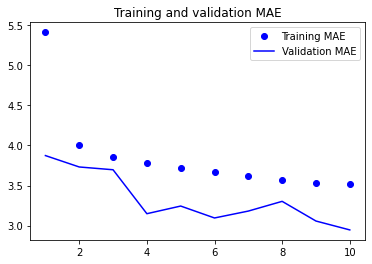

In [31]:
# 결과를 그래프로 그리기
import matplotlib.pyplot as plt
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1,len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training MAE')
plt.plot(epochs, val_loss, 'b', label = 'Validation MAE')
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [32]:
# 10 합성곱 모델 시도
inputs = keras.Input(shape=(sequence_length, raw_data2.shape[-1]))
x = layers.Conv1D(8,6,activation = 'relu')(inputs)
x = layers.MaxPool1D(2)(x)
x = layers.Conv1D(8,7,activation = 'relu')(inputs)
x = layers.MaxPool1D(2)(x)
x = layers.Conv1D(8,3,activation = 'relu')(inputs)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
callback = [
    keras.callbacks.ModelCheckpoint('jena_conv.keras', save_best_only=True)
]
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mae'])
history = model.fit(train_dataset,epochs=10,validation_data = val_dataset, callbacks = callback)

Epoch 1/10
819/819 [==============================] - 55s 66ms/step - loss: 77.3527 - mae: 7.1227 - val_loss: 60.3024 - val_mae: 6.3772
Epoch 2/10
819/819 [==============================] - 53s 64ms/step - loss: 62.2007 - mae: 6.3641 - val_loss: 46.9418 - val_mae: 5.5415
Epoch 3/10
819/819 [==============================] - 56s 68ms/step - loss: 44.5079 - mae: 5.2947 - val_loss: 32.3715 - val_mae: 4.4824
Epoch 4/10
819/819 [==============================] - 53s 64ms/step - loss: 29.8940 - mae: 4.2971 - val_loss: 24.7249 - val_mae: 3.8747
Epoch 5/10
819/819 [==============================] - 53s 64ms/step - loss: 24.6672 - mae: 3.9432 - val_loss: 21.7473 - val_mae: 3.7123
Epoch 6/10
819/819 [==============================] - 54s 65ms/step - loss: 23.9773 - mae: 3.9100 - val_loss: 22.5207 - val_mae: 3.7201
Epoch 7/10
819/819 [==============================] - 56s 68ms/step - loss: 23.9125 - mae: 3.9094 - val_loss: 21.4277 - val_mae: 3.6637
Epoch 8/10
819/819 [============================

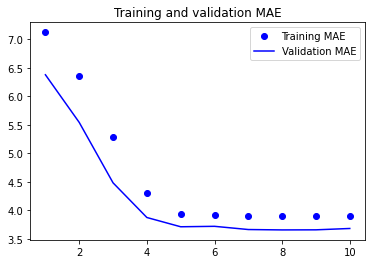

In [33]:
# 결과를 그래프로 그리기
import matplotlib.pyplot as plt
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1,len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training MAE')
plt.plot(epochs, val_loss, 'b', label = 'Validation MAE')
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [34]:
# 순환 신경망
# LSTM 기반 신경망
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs,outputs)
callback = [
    keras.callbacks.ModelCheckpoint('jena_lstm.keras', save_best_only=True)
]
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mae'])
history = model.fit(train_dataset,epochs=10,validation_data = val_dataset, callbacks = callback)

Epoch 1/10
819/819 [==============================] - 100s 119ms/step - loss: 79.1890 - mae: 7.1865 - val_loss: 80.9305 - val_mae: 7.3685
Epoch 2/10
819/819 [==============================] - 94s 114ms/step - loss: 43.6442 - mae: 5.1655 - val_loss: 37.6887 - val_mae: 5.0645
Epoch 3/10
819/819 [==============================] - 98s 120ms/step - loss: 28.2517 - mae: 4.1906 - val_loss: 18.8065 - val_mae: 3.4154
Epoch 4/10
819/819 [==============================] - 94s 115ms/step - loss: 24.9538 - mae: 3.9496 - val_loss: 30.8849 - val_mae: 4.3851
Epoch 5/10
819/819 [==============================] - 96s 116ms/step - loss: 20.4383 - mae: 3.5788 - val_loss: 13.9615 - val_mae: 2.9506
Epoch 6/10
819/819 [==============================] - 98s 119ms/step - loss: 16.8819 - mae: 3.2641 - val_loss: 13.8693 - val_mae: 2.9645
Epoch 7/10
819/819 [==============================] - 94s 115ms/step - loss: 15.6080 - mae: 3.1404 - val_loss: 12.7842 - val_mae: 2.8151
Epoch 8/10
819/819 [====================

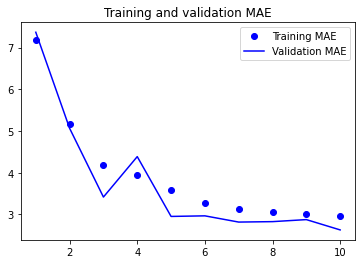

In [35]:
# 결과를 그래프로 그리기
import matplotlib.pyplot as plt
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1,len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training MAE')
plt.plot(epochs, val_loss, 'b', label = 'Validation MAE')
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [36]:
# RNN -> 넘파이로 구현
import numpy as np
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps,input_features))
state_t = np.zeros((output_features,  ))
W = np.random.random((output_features,input_features))
U = np.random.random((output_features,output_features))
b = np.random.random((output_features,  ))
suceesive_outputs = []
for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U,state_t) + b)
  suceesive_outputs.append(output_t)
  state_t = output_t
final_output_sequence = np.stack(suceesive_outputs, axis=0)

In [37]:
# keras의 순환 층
# RNN 층 
num_features = 14
inputs = keras.Input(shape = (None,num_features))
outputs = layers.SimpleRNN(16)(inputs)

In [38]:
# 마지막 출력 스텝만 반환하는 RNN층
num_features = 14
steps = 120
inputs = keras.Input(shape = (steps,num_features))
outputs = layers.SimpleRNN(16)(inputs)
print(outputs.shape)

(None, 16)


In [39]:
# 전체 출력 시퀀스를 반환하는 RNN층
num_features = 14
steps = 120
inputs = keras.Input(shape = (steps,num_features))
outputs = layers.SimpleRNN(16, return_sequences = True)(inputs)
print(outputs.shape)

(None, 120, 16)


In [40]:
# Stacking RNN layer
num_features = 14
steps = 120
inputs = keras.Input(shape = (steps,num_features))
x = layers.SimpleRNN(16, return_sequences = True)(inputs)
x = layers.SimpleRNN(16, return_sequences = True)(x)
outputs = layers.SimpleRNN(16, )(x)
print(outputs.shape)

(None, 16)


In [41]:
# 순환 신경망의 고급 사용법
# 과대적합을 감소하기 위해 순환 드랍 아웃
# 드랍아웃 규제를 적용한 LSTM 모델 훈련하고 평가

In [42]:
inputs = keras.Input(shape=(sequence_length, raw_data2.shape[-1]))
x = layers.LSTM(32,recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs,outputs)
callbacks = [
    keras.callbacks.ModelCheckpoint('jena_lstm_dropout.keras', save_best_only = True)
]
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
history = model.fit(train_dataset, epochs = 10, validation_data=val_dataset, callbacks = callback)

Epoch 1/10
819/819 [==============================] - 183s 220ms/step - loss: 62.6768 - mae: 6.2865 - val_loss: 32.2159 - val_mae: 4.3807
Epoch 2/10
819/819 [==============================] - 184s 224ms/step - loss: 39.4542 - mae: 4.9462 - val_loss: 21.8447 - val_mae: 3.6584
Epoch 3/10
819/819 [==============================] - 184s 224ms/step - loss: 33.1741 - mae: 4.5357 - val_loss: 20.0287 - val_mae: 3.5097
Epoch 4/10
819/819 [==============================] - 180s 220ms/step - loss: 30.2765 - mae: 4.3186 - val_loss: 18.4177 - val_mae: 3.3886
Epoch 5/10
819/819 [==============================] - 183s 223ms/step - loss: 27.4822 - mae: 4.1299 - val_loss: 17.3977 - val_mae: 3.2981
Epoch 6/10
819/819 [==============================] - 183s 223ms/step - loss: 24.7122 - mae: 3.9199 - val_loss: 15.0233 - val_mae: 3.0591
Epoch 7/10
819/819 [==============================] - 180s 219ms/step - loss: 22.2919 - mae: 3.7256 - val_loss: 16.9143 - val_mae: 3.2768
Epoch 8/10
819/819 [==============

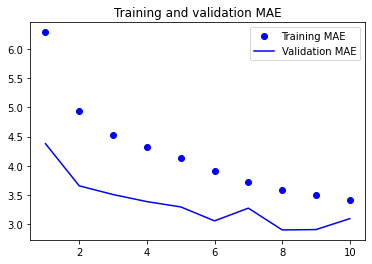

In [43]:
# 결과를 그래프로 그리기
import matplotlib.pyplot as plt
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(1,len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training MAE')
plt.plot(epochs, val_loss, 'b', label = 'Validation MAE')
plt.title("Training and validation MAE")
plt.legend()
plt.show()